In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, SimpleRNN
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model

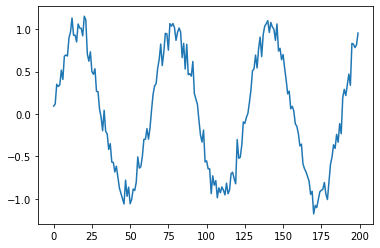

In [135]:
series=np.sin(0.1*np.arange(200))+np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [190]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)

N=len(X)
X = np.array(X).reshape(-1,T,1)  #reshape to NxTxD
Y = np.array(Y)
print(X.shape,Y.shape)

(190, 10, 1) (190,)


In [191]:
X[0].shape

(10, 1)

In [192]:
i = Input(shape=(X[0].shape))
x = SimpleRNN(10, activation='relu')(i)
x = Dense(1)(x)
model=Model(i,x)

In [193]:
model.compile(loss='mse',
             optimizer=Adam(lr=0.1),
             )

In [194]:
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80, validation_data=(X[-N//2:],Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 13ms/sample - loss: 0.2905 - val_loss: 0.1927
Epoch 2/80
95/95 [==============================] - 0s 541us/sample - loss: 0.1007 - val_loss: 0.0318
Epoch 3/80
95/95 [==============================] - 0s 535us/sample - loss: 0.0594 - val_loss: 0.0403
Epoch 4/80
95/95 [==============================] - 0s 515us/sample - loss: 0.0689 - val_loss: 0.0491
Epoch 5/80
95/95 [==============================] - 0s 536us/sample - loss: 0.0403 - val_loss: 0.0336
Epoch 6/80
95/95 [==============================] - 0s 536us/sample - loss: 0.0432 - val_loss: 0.0360
Epoch 7/80
95/95 [==============================] - 0s 546us/sample - loss: 0.0417 - val_loss: 0.0373
Epoch 8/80
95/95 [==============================] - 0s 519us/sample - loss: 0.0348 - val_loss: 0.0300
Epoch 9/80
95/95 [==============================] - 0s 555us/sample - loss: 0.0367 - val_loss: 0.0296
Epoch 10/80
95/95 [====================

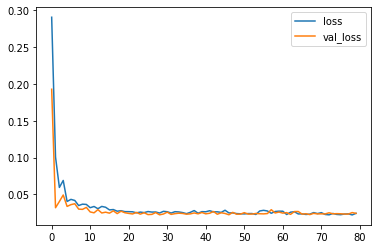

In [195]:
plt.plot(r.history["loss"],label='loss')
plt.plot(r.history["val_loss"],label='val_loss')
plt.legend()

In [196]:
print(X[0],X[0].shape)

[[0.0926282 ]
 [0.11786489]
 [0.35007775]
 [0.32377244]
 [0.34224502]
 [0.51697708]
 [0.40666774]
 [0.6824736 ]
 [0.69512395]
 [0.6833825 ]] (10, 1)


In [197]:
X[0].reshape(1,-1,1).shape

(1, 10, 1)

In [198]:
X[0].reshape(1,T,1).shape

(1, 10, 1)

# Wrong Prediction method

In [199]:
validation_target=Y[-N//2:]
validation_predictions=[]
i=-N//2
while(len(validation_predictions)<len(validation_target)):
    pred=model.predict(X[i].reshape(1,-1,1))[0,0]
    i+=1
    validation_predictions.append(pred)

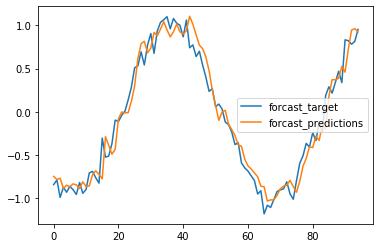

In [200]:
plt.plot(validation_target,label="forcast_target")
plt.plot(validation_predictions,label="forcast_predictions")
plt.legend()

# Right method by not taking values of X everytime but using already made predictions

In [201]:
validation_target=Y[-N//2:]
validation_predictions=[]
last_x=X[-N//2]
while(len(validation_predictions)<len(validation_target)):
    pred=model.predict(last_x.reshape(1,-1,1))[0,0]
    
    validation_predictions.append(pred)
    
    last_x=np.roll(last_x,-1)
    last_x[-1]=pred

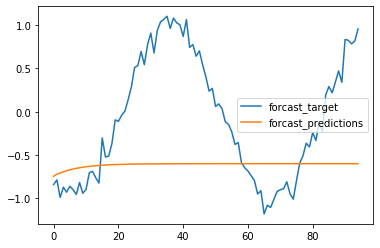

In [202]:
plt.plot(validation_target,label="forcast_target")
plt.plot(validation_predictions,label="forcast_predictions")
plt.legend()